In [1]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from pysheds.grid import Grid
import seaborn as sns
import warnings
import pywt

warnings.filterwarnings("ignore")

sns.set_palette("pastel")

%matplotlib inline

In [2]:
grid = Grid.from_raster("../data/n30w100_con", data_name="dem")

In [3]:
grid.read_raster("../data/n30w100_dir", data_name="dir")

In [4]:
# N    NE    E    SE    S    SW    W    NW
dirmap = (64, 128, 1, 2, 4, 8, 16, 32)

In [5]:
# Specify pour point
x, y = -97.2937, 32.7371

# Delineate the catchment
grid.catchment(
    data="dir",
    x=x,
    y=y,
    dirmap=dirmap,
    out_name="catch",
    recursionlimit=15000,
    xytype="label",
)

grid.accumulation

# Clip the bounding box to the catchment
grid.clip_to("catch", precision=5)

Unalignable bbox provided: [-97.4025   32.60667 -97.26167  32.73917].
Rounding to [-97.4025      32.60666667 -97.26166667  32.73916667]


In [6]:
grid.accumulation(data="dir", dirmap=dirmap)

In [7]:
branches, yx = grid.extract_river_network(catchment_name="catch", accumulation_name="acc")

In [8]:
dem = grid.view("dem", mask=False).astype(np.float64)

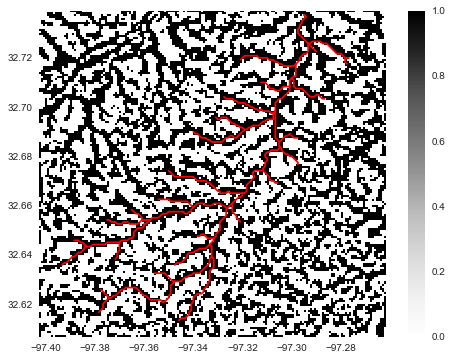

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.imshow((ndimage.gaussian_laplace(dem, 0.8) > 0).astype(int), zorder=1, extent=grid.extent)
plt.colorbar()

for branch in branches:
    line = yx[branch]
    plt.plot(line[:, 1], line[:, 0], c="r")

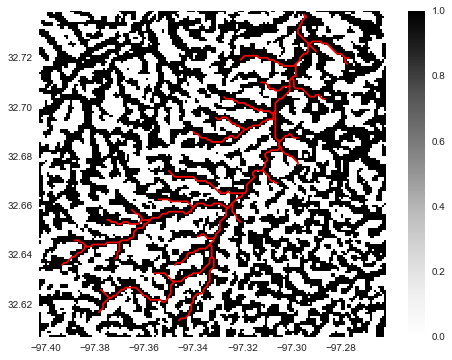

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.imshow((ndimage.gaussian_laplace(dem, 1) > 0).astype(int), zorder=1, extent=grid.extent)
plt.colorbar()

for branch in branches:
    line = yx[branch]
    plt.plot(line[:, 1], line[:, 0], c="r")

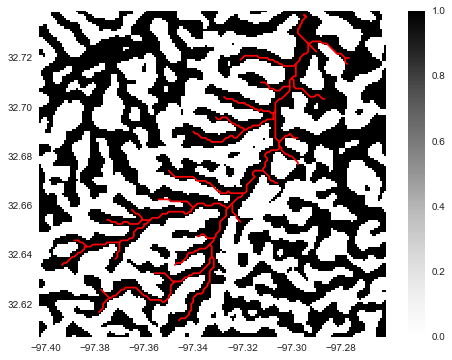

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.imshow((ndimage.gaussian_laplace(dem, 2) > 0).astype(int), zorder=1, extent=grid.extent)
plt.colorbar()

for branch in branches:
    line = yx[branch]
    plt.plot(line[:, 1], line[:, 0], c="r")

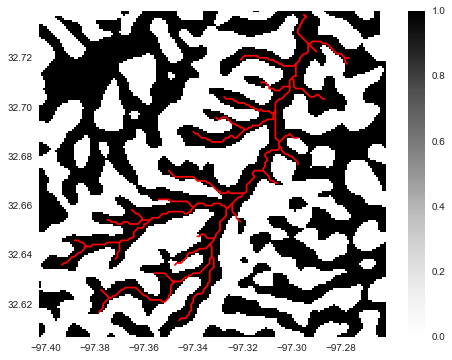

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.imshow((ndimage.gaussian_laplace(dem, 3) > 0).astype(int), zorder=1, extent=grid.extent)
plt.colorbar()

for branch in branches:
    line = yx[branch]
    plt.plot(line[:, 1], line[:, 0], c="r")

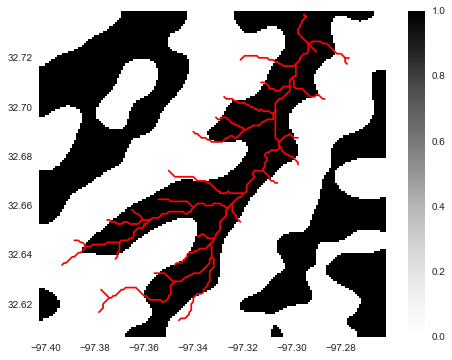

In [13]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.imshow((ndimage.gaussian_laplace(dem, 8) > 0).astype(int), zorder=1, extent=grid.extent)
plt.colorbar()

for branch in branches:
    line = yx[branch]
    plt.plot(line[:, 1], line[:, 0], c="r")

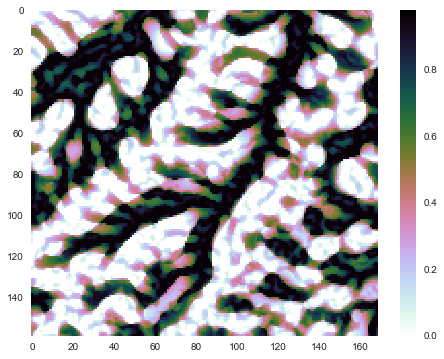

In [14]:
r = np.linspace(0.5, 8, 50)
z = np.zeros_like(dem)
for ri in r:
    z += (ndimage.gaussian_laplace(dem, ri) > 0).astype(int) / len(r)

fig, ax = plt.subplots(figsize=(8, 6))
plt.imshow(z, zorder=1, cmap="cubehelix_r")
plt.colorbar()